In [173]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [174]:
pd.set_option('display.max_row',7613)
pd.set_option('display.max_column',5)

In [175]:
data = pd.read_csv('train.csv')

In [203]:
data.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


**form analysis**

In [177]:
df = data.copy()

In [178]:
df.shape

(891, 12)

In [224]:
df.dtypes.value_counts()


int64      4
float64    2
object     1
Name: count, dtype: int64

<Axes: >

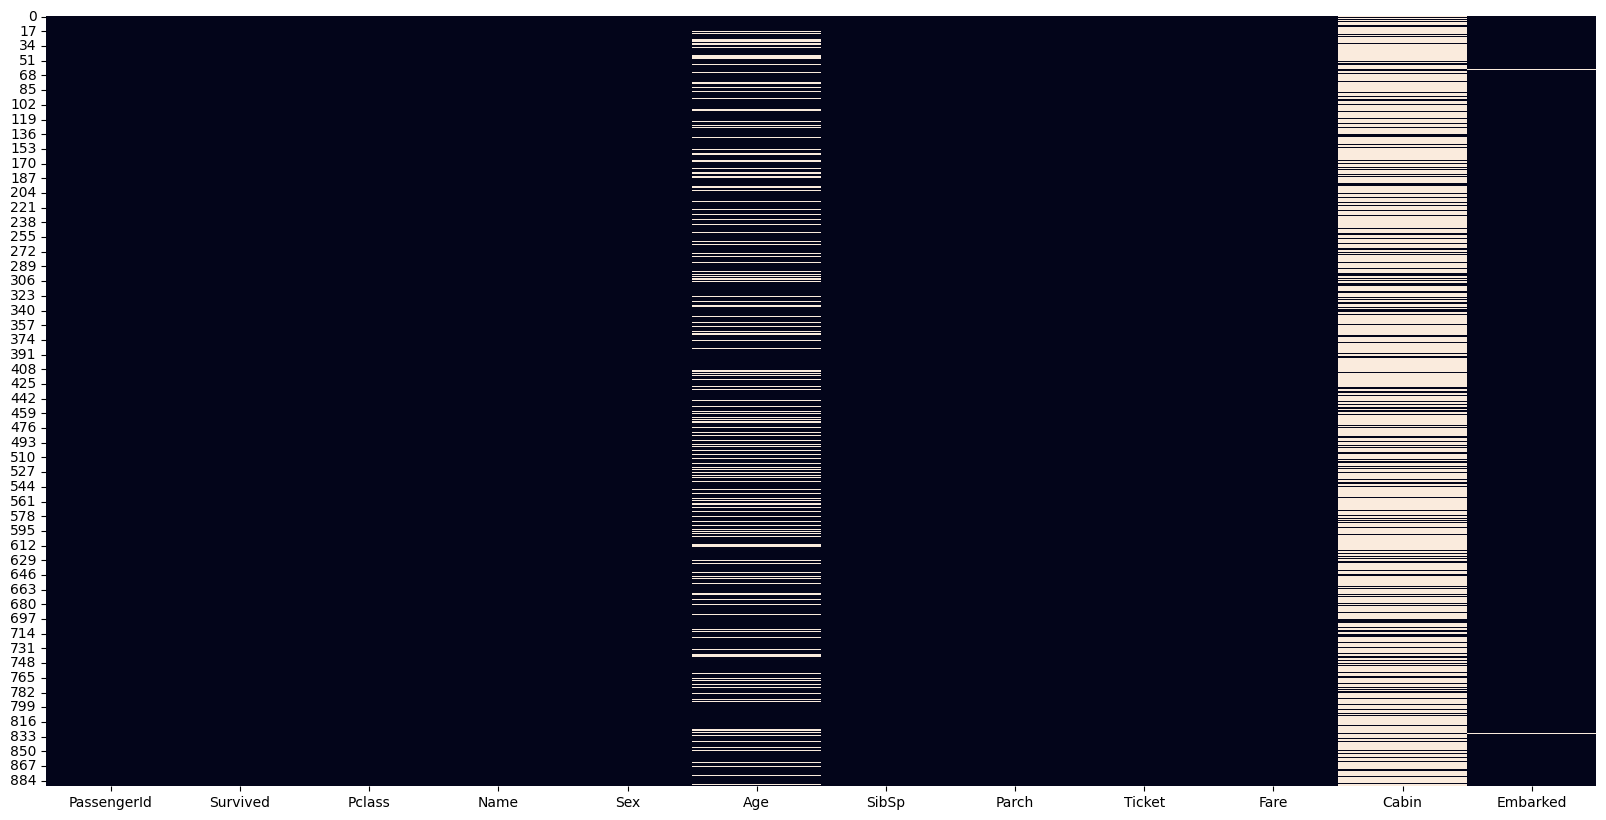

In [180]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [225]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Age         0.198653
dtype: float64

## Content Analysis :



**Eleminate useless columns**

In [182]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.77]]

In [183]:
df = df.drop('PassengerId',axis=1)
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
df = df.drop('Embarked', axis=1)


In [184]:
df.head()

,Survived,Pclass,...,Parch,Fare
0,0,3,...,0,7.2500
1,1,1,...,0,71.2833
2,1,3,...,0,7.9250
3,1,1,...,0,53.1000
4,0,3,...,0,8.0500


In [204]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

**histogram of the continuous variables**

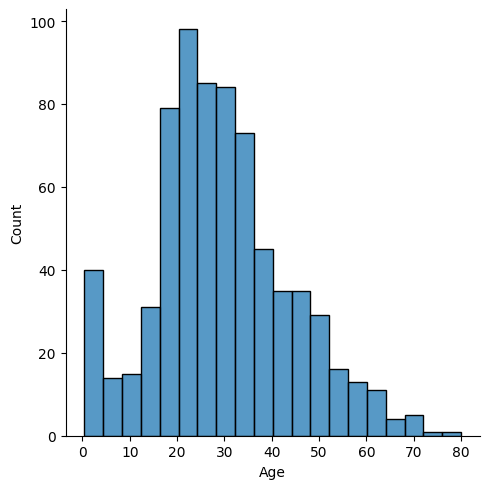

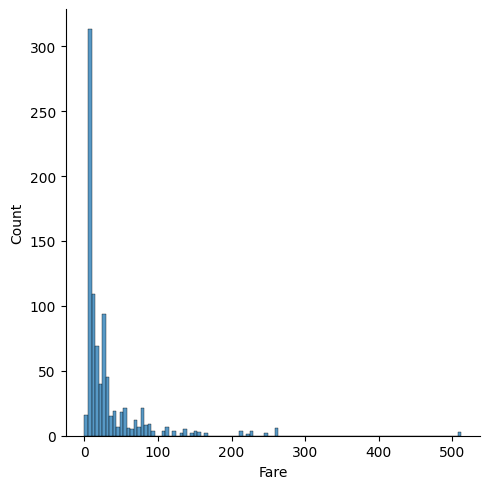

In [186]:
for col in df.select_dtypes('float'):
    sns.displot(df[col])

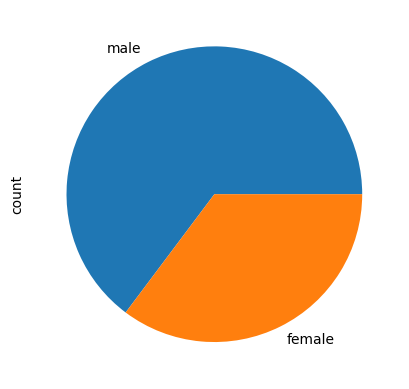

In [189]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

**Relation between Target/Variables**

In [216]:
positive_df = df[df['Survived'] == '1']


In [217]:
negative_df = df[df['Survived'] == '0']

**creation of the sets cabin and age**

In [218]:
missing_rate = df.isna().sum()/df.shape[0]

In [219]:
age_columns = df.columns[(missing_rate < 0.9)& (missing_rate >0.17) ]

<Axes: xlabel='Age', ylabel='count'>

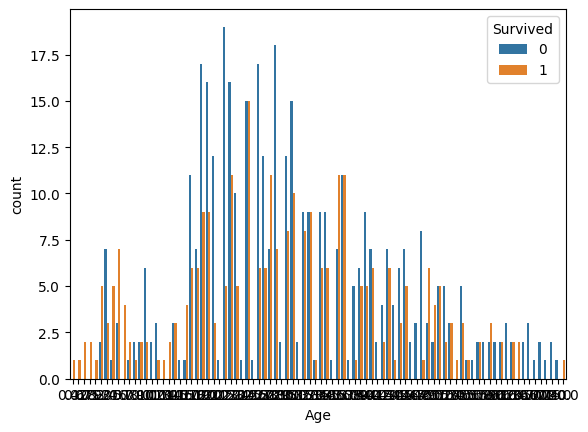

In [221]:
sns.countplot(x='Age',hue='Survived', data=df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

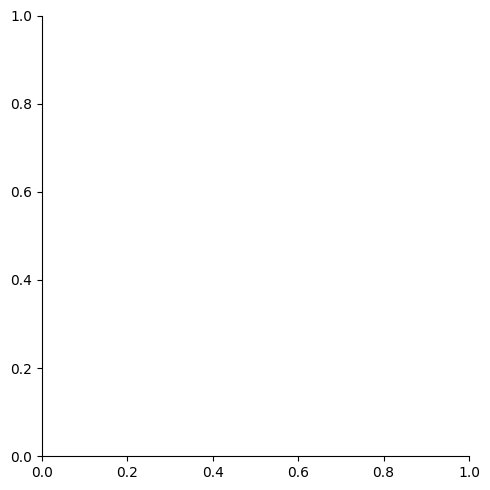

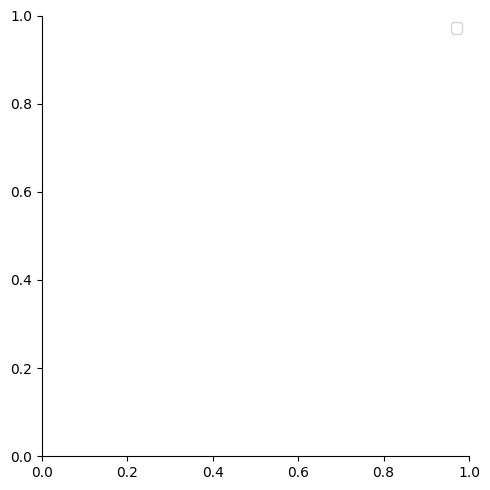

In [254]:
#hadi mabghatch tmchi jcp 3lh
for col in age_columns:
    plt.figure()
    sns.displot(positive_df[col])
    sns.displot(negative_df[col])
    plt.legend()
    

## Survived/qualitative variables

In [252]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


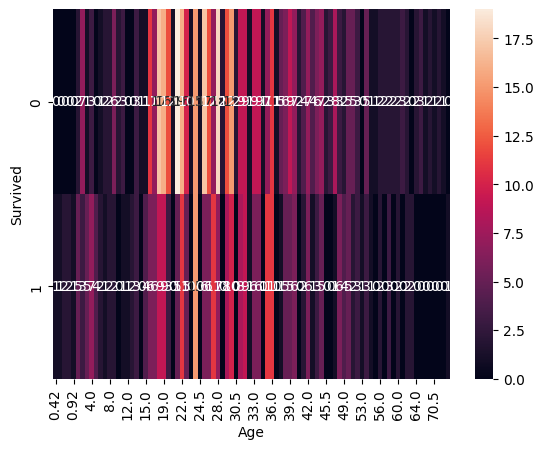

In [253]:
#hadi rahi mkhalta lazem ya tengla3 ya tetsegem
for col in age_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Survived'],df[col]),annot=True,fmt='d')

## khosna n3rfo sibsp chafiha w parch chafiha
## rani habes fla video 33:20 

***Basic Checklist :***

**Form Analysis :**

Target variable : survived (0 or 1)

Rows and columns : 891 row 12 column

Types of variables : quantitatives = Age (continuous) Fare (continuous) SibSp (discrete) Parch (discrete)   
                       qualitative = (survived ,pclass ,sex)

Missing values analysis :we will consider cabine because it is significantly missing  other than that we also choose to take age with 19% missing content 

**Content Analysis :**

Visualization of the target : 38% of the people survived 
the rest didnt ...


Meaning of the variables : quantitative variables:- 'fair' is standarized (its centred on 0 )
                                                  - 'Age' is fractional if less than 1.xxIf ,the age is estimated, is it in the form of xx.5
                                                  
                                                  - 'sibsp' is 
                                                  - 'parch' is 

                           qualitative variables:-'survived' is the actual target with binary values  
                                                 - 'sex' is binary (obviously) and its basically telling that men were more than females on this study 
                                                 -'pclass' has 3 values (1,2,3)
    

Relationship between variables and target : survival/age    we see that the younger ppl had more chances to not survive